In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#Generate synthetic weather data
np.random.seed(0)
n_samples = 1000

In [6]:
humidity = np.random.uniform(0,100,n_samples)
pressure= np.random.uniform(980,1050, n_samples)
wind_speed = np.random.uniform(0,30,n_samples)
temperature = 20+0.5 * humidity - 0.02 * pressure + 0.1 * wind_speed + np.random.normal(0,2,n_samples)

#create a Dataframe from the generated data
weather_data = pd.DataFrame({'humidity':humidity,'pressure':pressure,'wind_speed':wind_speed, 'temperature':temperature})

Text(0.5, 1.0, 'Wind Speed Vs. Temperature')

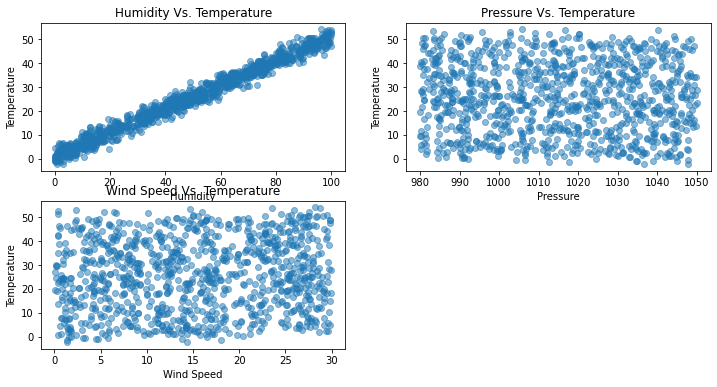

In [8]:
#Visualize the data
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.scatter(weather_data['humidity'], weather_data['temperature'],alpha=0.5)
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.title('Humidity Vs. Temperature')

plt.subplot(2,2,2)
plt.scatter(weather_data['pressure'], weather_data['temperature'],alpha=0.5)
plt.xlabel('Pressure')
plt.ylabel('Temperature')
plt.title('Pressure Vs. Temperature')

plt.subplot(2,2,3)
plt.scatter(weather_data['wind_speed'], weather_data['temperature'],alpha=0.5)
plt.xlabel('Wind Speed')
plt.ylabel('Temperature')
plt.title('Wind Speed Vs. Temperature')


In [9]:
#split data into features (X) and target (Y)
x= weather_data[['humidity','pressure','wind_speed']]
y=weather_data['temperature']

#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [10]:
#create and train a Linear regression model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [11]:
#make prediction on the test data
y_pred = model.predict(x_test)

In [12]:
#Evaluate the model
mae= mean_absolute_error(y_test,y_pred)
mse= mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')

Mean Absolute Error:1.649561066691896
Mean Squared Error:4.537888373863261


Text(0.5, 1.0, 'Actual VS Predicted Temperature')

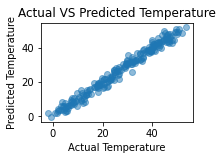

In [13]:
#visualizing the model prediction vs. actual values
plt.subplot(2,2,4)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual VS Predicted Temperature')

In [14]:
#show the plots
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [15]:
#Now you can use the trained model to make predictions on new data
new_data = pd.DataFrame({'humidity':[65], 'pressure':[1005],'wind_speed':[15]})
prediction = model.predict(new_data)
print(f'Predicted Temperature: {prediction[0]}')

Predicted Temperature: 33.69941619942329
